# First Ballot Hall of Famers

### *Are there differences between 'First Ballot' Hall of Famers versus those who take multiple years on the ballot to be inducted?*

Obviously being inducted into the Baseball Hall of Fame is a great achievement. However, many people believe that players inducted in their first year on the ballot should be viewed differently than players that are elected after more than one year on the ballot. They argue that if a player isn't inducted the first year they are probably not as good as someone inducted the first year.

I was interested to see if there actually differences between the two groups of players in the Hall of Fame. I compared the percent of votes that players received, home runs, and hits for the two groups.

This data came from http://www.seanlahman.com/baseball-archive/statistics/. The link to the 2016 csv files is http://seanlahman.com/files/database/baseballdatabank-2017.1.zip.

#### Note: None of the below chould be taken to imply causation. The scope of this analysis is only to look at correlation and see how closely the reviewed data aligns, not if a given variable causes changes in another.

## Data Cleansing

#### Hall of Fame Data

1. I first imported HallofFame.csv to get all the voting data for the Hall of Fame.
2. I then filtered that dataframe to only include players (exclude Managers, Umpires, Executives) and added columns that computed how many years a player appeared on the ballot, what percentage of the voted they received, and whether they were voted in on the first ballot or not.
3. After adding the computed columns I was able to filter to only show those players that had been inducted into the Hall of Fame

This left me with a dataframe that contained a unique list of players that had been inducted into the Hall of Fame. For each player the data showed how many years they appeared on the ballot, the percentage of vote they received they year they were inducted, and whether they were inducted on the first ballot or not.

#### Batting Data

1. I first imported Batting.csv to get all the batting data for players.
2. I then merged the batting data with Hall of Fame data to get only batting data for players that were inducted into the Hall of Fame.
3. Finally I grouped the data by playerID so that I could get career statistics for players rather than by year.

This left me with a dataframe that contained a unique list of players inducted to the Hall of Fame. For each player the data showed career batting statistics (i.e. at bats, home runs, hits, etc.) as well as the Hall of Fame data described above.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_palette('winter',n_colors=2)


# import hall of fame csv
hall_of_famers = pd.read_csv('HallOfFame.csv')

# filter for only players
hall_of_famers =  hall_of_famers[hall_of_famers['category'] == 'Player']

# add column showing years appeared on ballot
hall_of_famers['countYears'] = hall_of_famers.groupby(['playerID'])['yearid'].transform('count')
# add column showing percent of vote received
hall_of_famers['percentVote'] = (hall_of_famers['votes']/hall_of_famers['ballots'])
# add column showing if first ballot or not
hall_of_famers['firstBallot'] = np.where((hall_of_famers['inducted'] == 'Y') & (hall_of_famers['countYears'] == 1),'Y','N')

# filter for only those players that have been inducted
hall_of_famers_inducted = hall_of_famers[hall_of_famers['inducted']=='Y']


# import batting csv
batting = pd.read_csv('Batting.csv')

# filter for only hall_of_famers
batting_hof = batting.merge(hall_of_famers_inducted, on='playerID')

# group by playerID
batting_hof_grouped = batting_hof[['playerID','G','AB','R','H','HR','RBI','firstBallot','percentVote']].groupby(['playerID','firstBallot','percentVote'],as_index=False).sum()


### Percentage of Vote Received

Here I looked to see if players get inducted with a higher percentage of votes if they make it on the first ballot. The below boxplot shows that players voted in on the first ballot have a higher mean and almost the entire interquartile range is above the interquartile range of those inducted in subsequent years. The histogram shows a similar story, with first ballot Hall of Famers being negatively skewed and further along the x axis. Meaning those inducted in the first year received a higher percentage of votes on average. This makes sense, as those that make it on the first year are probably players that everyone agrees should be in the Hall of Fame while those that make it in later years may be more controversial with more people feeling they don't belong in the Hall of Fame.

[<matplotlib.text.Text at 0xd75e0f0>, <matplotlib.text.Text at 0xd78ea58>]

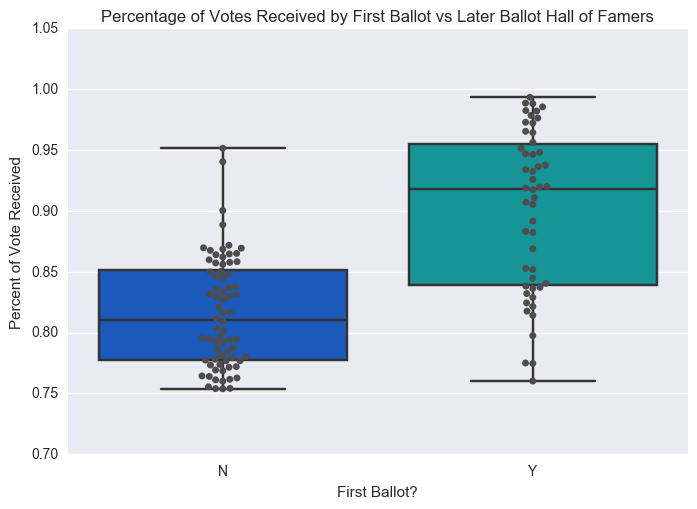

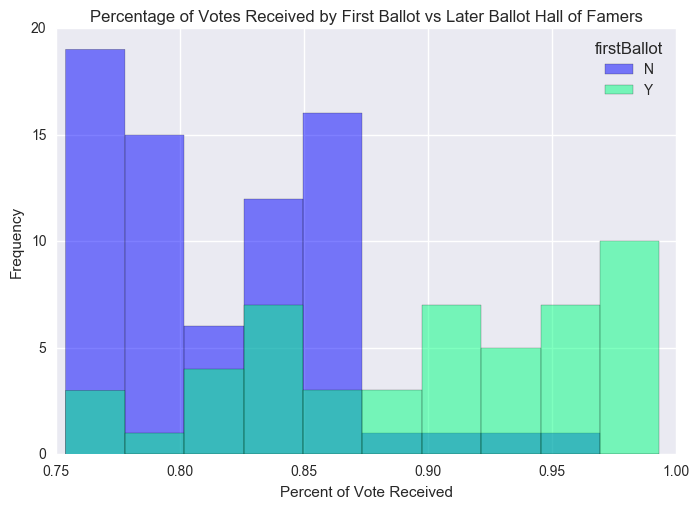

In [2]:
# pivot the data by player on whether they were first ballot or not
hofpivot = hall_of_famers_inducted.pivot(index='playerID',columns='firstBallot',values='percentVote')

bp = sns.boxplot(data=hofpivot)
sns.swarmplot(data=hofpivot,color='.3')
bp.set(xlabel = 'First Ballot?', ylabel = 'Percent of Vote Received', title = 'Percentage of Votes Received by First Ballot vs Later Ballot Hall of Famers')

hg = hofpivot.plot.hist(alpha=.5,colormap='winter')
hg.set(xlabel="Percent of Vote Received",title = 'Percentage of Votes Received by First Ballot vs Later Ballot Hall of Famers')

### Percentage of Vote Received vs. Number of Years on Ballot

The below scatterplot shows that percentage received and number of years on the ballot is mildly negatively correlated (-0.46). (As stated in the beginning this just shows correlation not causation)

Correlation of countYears and percentVote:
-0.463424266799


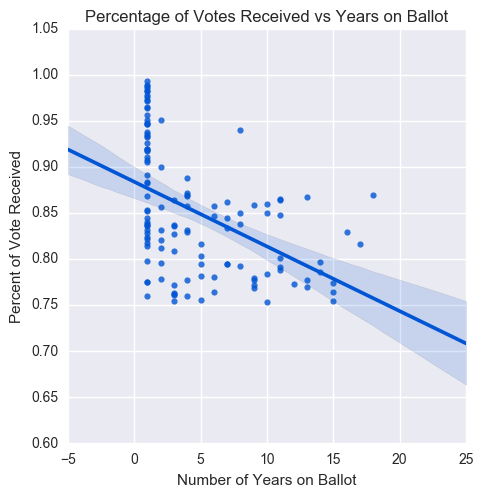

In [3]:
p = sns.lmplot(x='countYears',y='percentVote',data=hall_of_famers_inducted,fit_reg=True)
p.set(xlabel='Number of Years on Ballot',ylabel='Percent of Vote Received',title = 'Percentage of Votes Received vs Years on Ballot')
print 'Correlation of countYears and percentVote:'
print hall_of_famers_inducted[['countYears','percentVote']].corr(method='pearson')['countYears']['percentVote']

### Hits by First Ballot and Non First Ballot Hall of Famers

I then wanted to look at hitting statistics between the 2 groups of Hall of Fame players. First I looked at career hits, creating a pivot that filters out players that had less than 1000 hits.
As can be seen in the below boxplot and histogram the mean hits for first ballot players is higher than later ballot players. The distribution looks similar, but is shifted slightly to the right on the histogram. It appears that if you have over 3,000 hits you are more likely to be inducted on the first ballot, however it is important to remember further statistical analysis is not being performed here.

[<matplotlib.text.Text at 0xcb03e48>, <matplotlib.text.Text at 0xce09c88>]

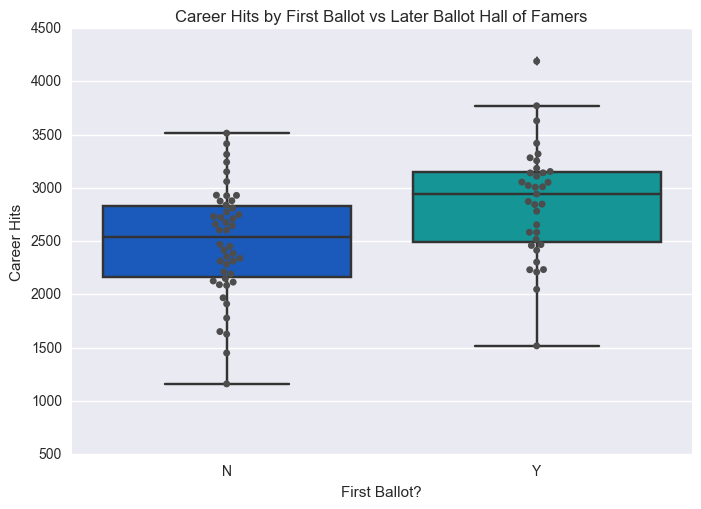

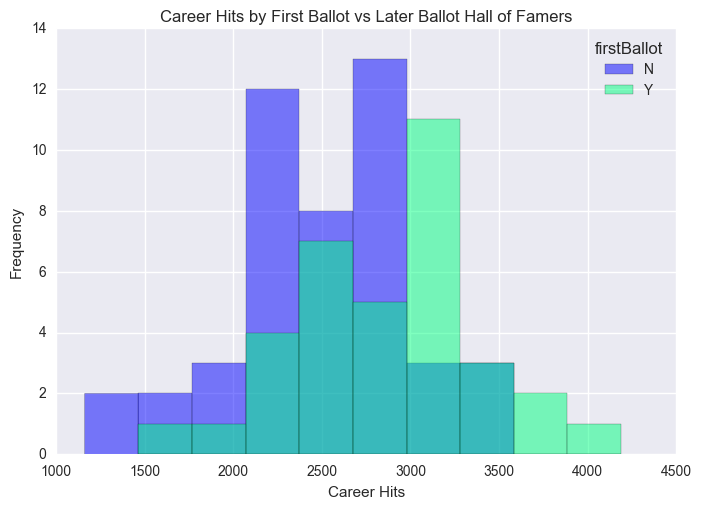

In [4]:
# pivot the data by player on whether they were first ballot or not
h = batting_hof_grouped[batting_hof_grouped['H']>1000].pivot(index='playerID',columns='firstBallot',values='H')

bp = sns.boxplot(data=h)
sns.swarmplot(data=h,color='.3')
bp.set(xlabel='First Ballot?',ylabel='Career Hits',title = 'Career Hits by First Ballot vs Later Ballot Hall of Famers')

hg = h.plot.hist(alpha=.5,colormap='winter')
hg.set(xlabel='Career Hits',title = 'Career Hits by First Ballot vs Later Ballot Hall of Famers')

### Correlation Between Hits and Percent of Vote Received

The below scatterplot shows the correlation between how many career hits and the percent of vote received for first ballot and subsequent ballot players. As seen the correlation is pretty similar between both. Players that have more hits tend to receive more votes. (As stated in the beginning this just shows correlation not causation)

Correlation of H and percentVote for all Hall of Famers:
0.441429404841
Correlation of H and percentVote for first ballot Hall of Famers:
0.398944308466
Correlation of H and percentVote for later ballot Hall of Famers:
0.258882200175


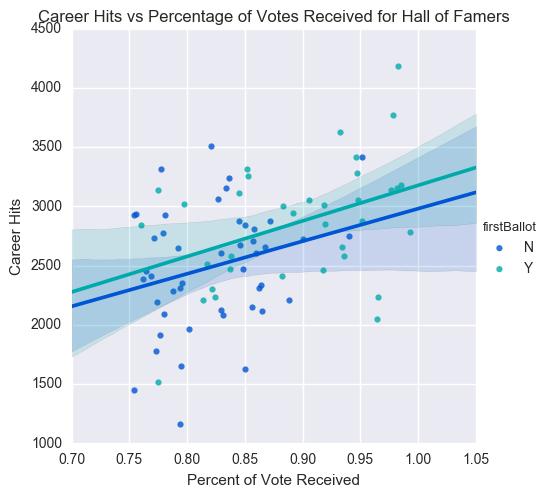

In [5]:
p = sns.lmplot(x='percentVote',y='H',data=batting_hof_grouped[batting_hof_grouped['H']>1000].sort_values(by='firstBallot'),fit_reg=True,hue='firstBallot')
p.set(xlabel='Percent of Vote Received',ylabel='Career Hits',title = 'Career Hits vs Percentage of Votes Received for Hall of Famers')
print 'Correlation of H and percentVote for all Hall of Famers:'
print batting_hof_grouped[batting_hof_grouped['H']>1000][['H','percentVote']].corr(method='pearson')['H']['percentVote']
print 'Correlation of H and percentVote for first ballot Hall of Famers:'
print batting_hof_grouped[(batting_hof_grouped['H']>1000)&(batting_hof_grouped['firstBallot']=='Y')][['H','percentVote']].corr(method='pearson')['H']['percentVote']
print 'Correlation of H and percentVote for later ballot Hall of Famers:'
print batting_hof_grouped[(batting_hof_grouped['H']>1000)&(batting_hof_grouped['firstBallot']=='N')][['H','percentVote']].corr(method='pearson')['H']['percentVote']

### Home Runs by First Ballot and Non First Ballot Hall of Famers

Next I looked at career home runs, creating a pivot that filters out players that had less than 100 home runs.
As can be seen in the below boxplot and histogram the mean home runs for first ballot players is higher than later ballot players. The distributions also look pretty different. The non first ballot players have a positively skewed distribution, while first ballot players are somewhat more normal. It looks like having over 500 home runs pretty much means you will be a first ballot inductee, and if you have less than 400 you would be on a later ballot. However, it is important to remember further statistical analysis is not being performed here.

[<matplotlib.text.Text at 0xd3ba978>, <matplotlib.text.Text at 0xd4874e0>]

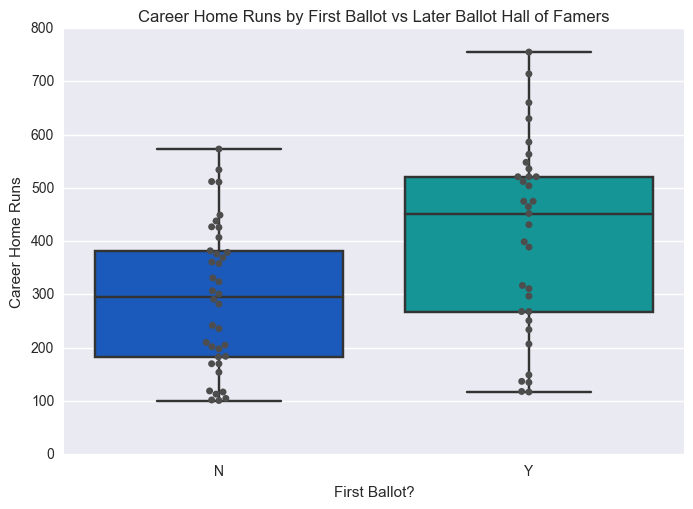

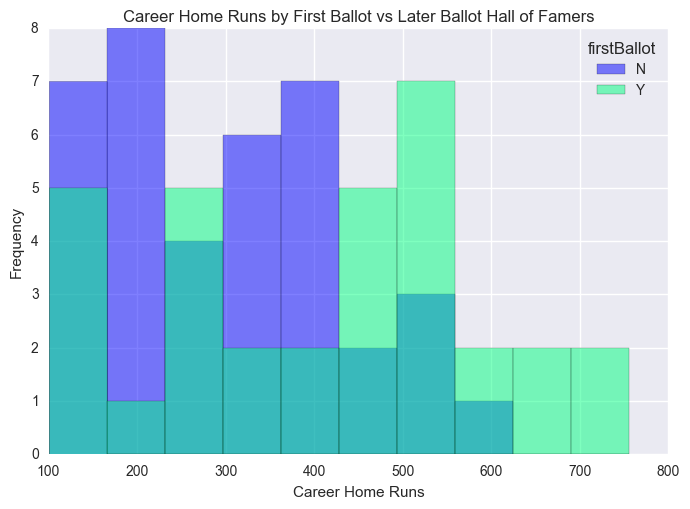

In [6]:
hr = batting_hof_grouped[batting_hof_grouped['HR']>100].pivot(index='playerID',columns='firstBallot',values='HR')

bp = sns.boxplot(data=hr)
sns.swarmplot(data=hr,color='.3')
bp.set(xlabel='First Ballot?',ylabel='Career Home Runs',title = 'Career Home Runs by First Ballot vs Later Ballot Hall of Famers')

hg = hr.plot.hist(alpha=.5,colormap='winter')
hg.set(xlabel='Career Home Runs',title = 'Career Home Runs by First Ballot vs Later Ballot Hall of Famers')

### Correlation Between Home Runs and Percent of Vote Received

The below scatterplot shows the correlation between career home runs and the percent of vote received for first ballot and subsequent ballot players. As seen the correlation for first ballot players is as expected, albeit not very strong. The more home runs a player has the more votes they tend to recieve. However, non first ballot players don't follow that same pattern. There isn't much of a correlation at all. Meaning it seems that if you are low on home runs missing out on the first ballot isn't necessarily a bad thing, voters seem more willing to overlook a lower home run total if you have been on the ballot before. It seems that overall home runs aren't as great of an indicator of what percentage of people will vote for someone.  
(As stated in the beginning this just shows correlation not causation)

Correlation of HR and percentVote for all Hall of Famers:
0.278765344185
Correlation of HR and percentVote for first ballot Hall of Famers:
0.295983147038
Correlation of HR and percentVote for later ballot Hall of Famers:
-0.181488457742


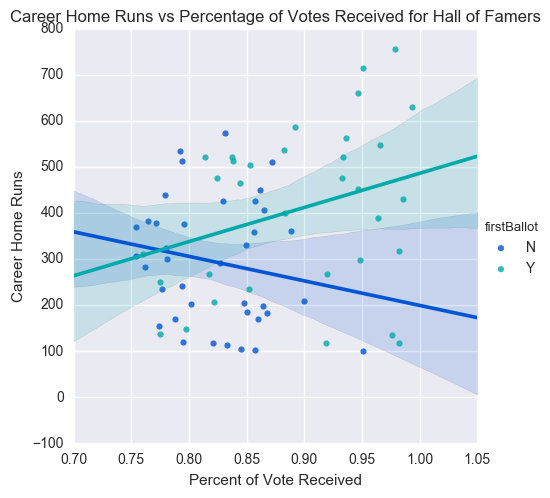

In [7]:
p = sns.lmplot(x='percentVote',y='HR',data=batting_hof_grouped[batting_hof_grouped['HR']>100].sort_values(by='firstBallot'),fit_reg=True,hue='firstBallot')
p.set(xlabel='Percent of Vote Received',ylabel='Career Home Runs',title = 'Career Home Runs vs Percentage of Votes Received for Hall of Famers')
print 'Correlation of HR and percentVote for all Hall of Famers:'
print batting_hof_grouped[batting_hof_grouped['HR']>100][['HR','percentVote']].corr(method='pearson')['HR']['percentVote']
print 'Correlation of HR and percentVote for first ballot Hall of Famers:'
print batting_hof_grouped[(batting_hof_grouped['HR']>100)&(batting_hof_grouped['firstBallot']=='Y')][['HR','percentVote']].corr(method='pearson')['HR']['percentVote']
print 'Correlation of HR and percentVote for later ballot Hall of Famers:'
print batting_hof_grouped[(batting_hof_grouped['HR']>100)&(batting_hof_grouped['firstBallot']=='N')][['HR','percentVote']].corr(method='pearson')['HR']['percentVote']